In [1]:
from phomo import Mosaic, Master, Pool

In [2]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))

Loading tiles:   0%|          | 0/9780 [00:00<?, ?it/s]

In [3]:
from random import sample
from pathlib import Path

master_file = sample(list(Path("faces").glob('*')), 1)[0]

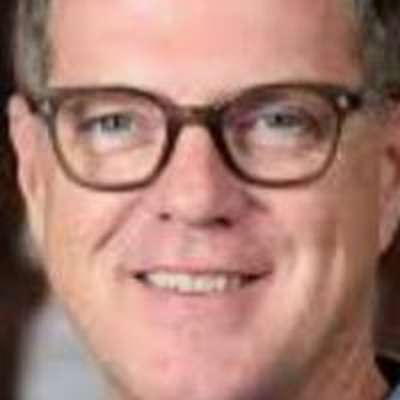

In [4]:
master = Master.from_file(master_file, img_size=(400, 400))
master.img

In [5]:
mosaic = Mosaic(master, pool)

# Serial computation

Building distance matrix:   0%|          | 0/400 [00:00<?, ?it/s]

Building mosaic:   0%|          | 0/400 [00:00<?, ?it/s]

CPU times: user 8.84 s, sys: 6.04 s, total: 14.9 s
Wall time: 14.9 s


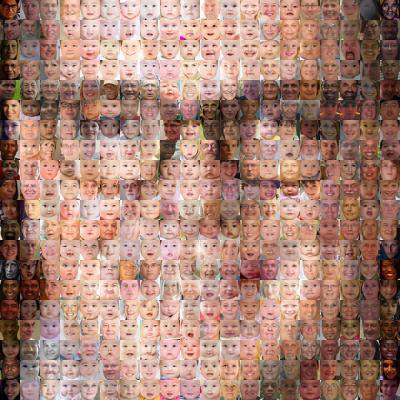

In [6]:
%time mosaic.build();

# Multiple cores
Using multple cores somewhat breaks the tqdm progress bar.

Building distance matrix:   0%|          | 0/400 [00:00<?, ?it/s]

Building mosaic:   0%|          | 0/400 [00:00<?, ?it/s]

CPU times: user 1.14 s, sys: 118 ms, total: 1.26 s
Wall time: 8.96 s


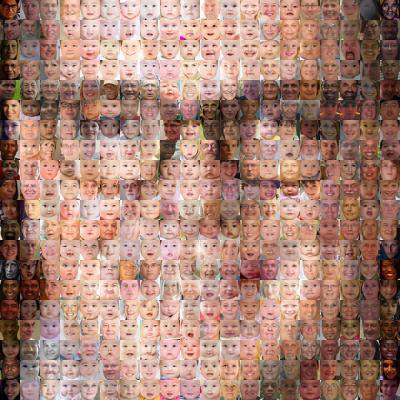

In [7]:
%time mosaic.build(workers=2);

Building distance matrix:   0%|          | 0/400 [00:00<?, ?it/s]

Building mosaic:   0%|          | 0/400 [00:00<?, ?it/s]

CPU times: user 1.02 s, sys: 80.7 ms, total: 1.1 s
Wall time: 7.67 s


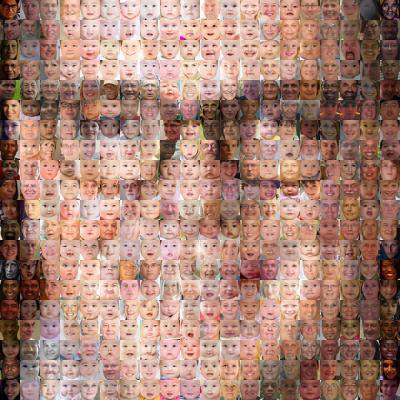

In [8]:
%time mosaic.build(workers=4);

Building distance matrix:   0%|          | 0/400 [00:00<?, ?it/s]

Building mosaic:   0%|          | 0/400 [00:00<?, ?it/s]

CPU times: user 1.16 s, sys: 157 ms, total: 1.32 s
Wall time: 8.08 s


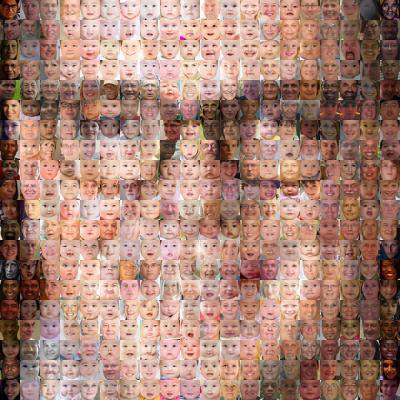

In [9]:
%time mosaic.build(workers=8);

Building distance matrix:   0%|          | 0/400 [00:00<?, ?it/s]

Building mosaic:   0%|          | 0/400 [00:00<?, ?it/s]

CPU times: user 1.49 s, sys: 409 ms, total: 1.9 s
Wall time: 10.5 s


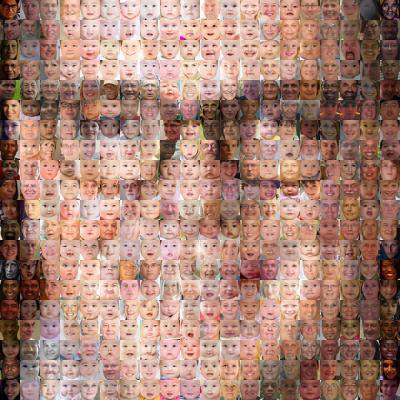

In [10]:
%time mosaic.build(workers=16);

On my system it seems using more that when going above 4 cores, the overhead slows downs the computation.